# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [3]:
#Setting up the working directory

os.chdir("E:\PGP AIML\Labs\Residency 5\Internal") 

In [4]:
#Importing Data

df = pd.read_csv('breast-cancer-wisconsin.data.txt', sep=',', 
                 names=['samplecodenumber', 'clumpthickness', 'uniformityofcellsize', 'uniformityofcellshape','marginaladhesion',
                        'singleepithelialcellsize','barenuclei','blandchromatin','normalnucleoli','mitoses','class'])

In [5]:
df.head(10)

,samplecodenumber,clumpthickness,uniformityofcellsize,uniformityofcellshape,marginaladhesion,singleepithelialcellsize,barenuclei,blandchromatin,normalnucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [6]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [7]:
df.dtypes

#Some issue with bare nuclei column. It's mentioned all the columns are numerical values but data type we got is object

samplecodenumber             int64
clumpthickness               int64
uniformityofcellsize         int64
uniformityofcellshape        int64
marginaladhesion             int64
singleepithelialcellsize     int64
barenuclei                  object
blandchromatin               int64
normalnucleoli               int64
mitoses                      int64
class                        int64
dtype: object

In [8]:
df.shape

(699, 11)

In [9]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
samplecodenumber,699,NaN,NaN,NaN,1.0717e+06,617096,61634,870688,1.17171e+06,1.2383e+06,1.34544e+07
clumpthickness,699,NaN,NaN,NaN,4.41774,2.81574,1,2,4,6,10
uniformityofcellsize,699,NaN,NaN,NaN,3.13448,3.05146,1,1,1,5,10
uniformityofcellshape,699,NaN,NaN,NaN,3.20744,2.97191,1,1,1,5,10
marginaladhesion,699,NaN,NaN,NaN,2.80687,2.85538,1,1,1,4,10
singleepithelialcellsize,699,NaN,NaN,NaN,3.21602,2.2143,1,2,2,4,10
barenuclei,699,11,1,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blandchromatin,699,NaN,NaN,NaN,3.43777,2.43836,1,2,3,5,10
normalnucleoli,699,NaN,NaN,NaN,2.86695,3.05363,1,1,1,4,10
mitoses,699,NaN,NaN,NaN,1.58941,1.71508,1,1,1,1,10


In [10]:
df.barenuclei.unique()

# There is a '?' in bare nuclei column

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [11]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [12]:
df.isnull().sum()

samplecodenumber            0
clumpthickness              0
uniformityofcellsize        0
uniformityofcellshape       0
marginaladhesion            0
singleepithelialcellsize    0
barenuclei                  0
blandchromatin              0
normalnucleoli              0
mitoses                     0
class                       0
dtype: int64

In [13]:
# No missing values found. So let us try to remove ? from bare nuclei column
# Get count of rows having ?

df["barenuclei"].value_counts()

# 16 rows with '?'

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: barenuclei, dtype: int64

In [14]:
df['barenuclei'] = np.where(df['barenuclei'] == '?',1,df['barenuclei'])

#Replacing missing value with model which is equal to 1. Value 1 is present in ~60% of the data so its a appropriate imputation.

In [15]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [16]:
df['barenuclei'] = df['barenuclei'].astype(str).astype(int)

In [17]:
df["barenuclei"].value_counts()

1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: barenuclei, dtype: int64

In [18]:
df.dtypes

samplecodenumber            int64
clumpthickness              int64
uniformityofcellsize        int64
uniformityofcellshape       int64
marginaladhesion            int64
singleepithelialcellsize    int64
barenuclei                  int32
blandchromatin              int64
normalnucleoli              int64
mitoses                     int64
class                       int64
dtype: object

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [19]:
# Check for correlation of variable

In [20]:
df_code = df['samplecodenumber']
df = df.drop(['samplecodenumber'], axis=1)

#Storing sample code column in a separate dataframe for future use if needed and dropping it from main data frame

In [21]:
df.corr()

,clumpthickness,uniformityofcellsize,uniformityofcellshape,marginaladhesion,singleepithelialcellsize,barenuclei,blandchromatin,normalnucleoli,mitoses,class
clumpthickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
uniformityofcellsize,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
uniformityofcellshape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
marginaladhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
singleepithelialcellsize,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
barenuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
blandchromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
normalnucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


E:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
E:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


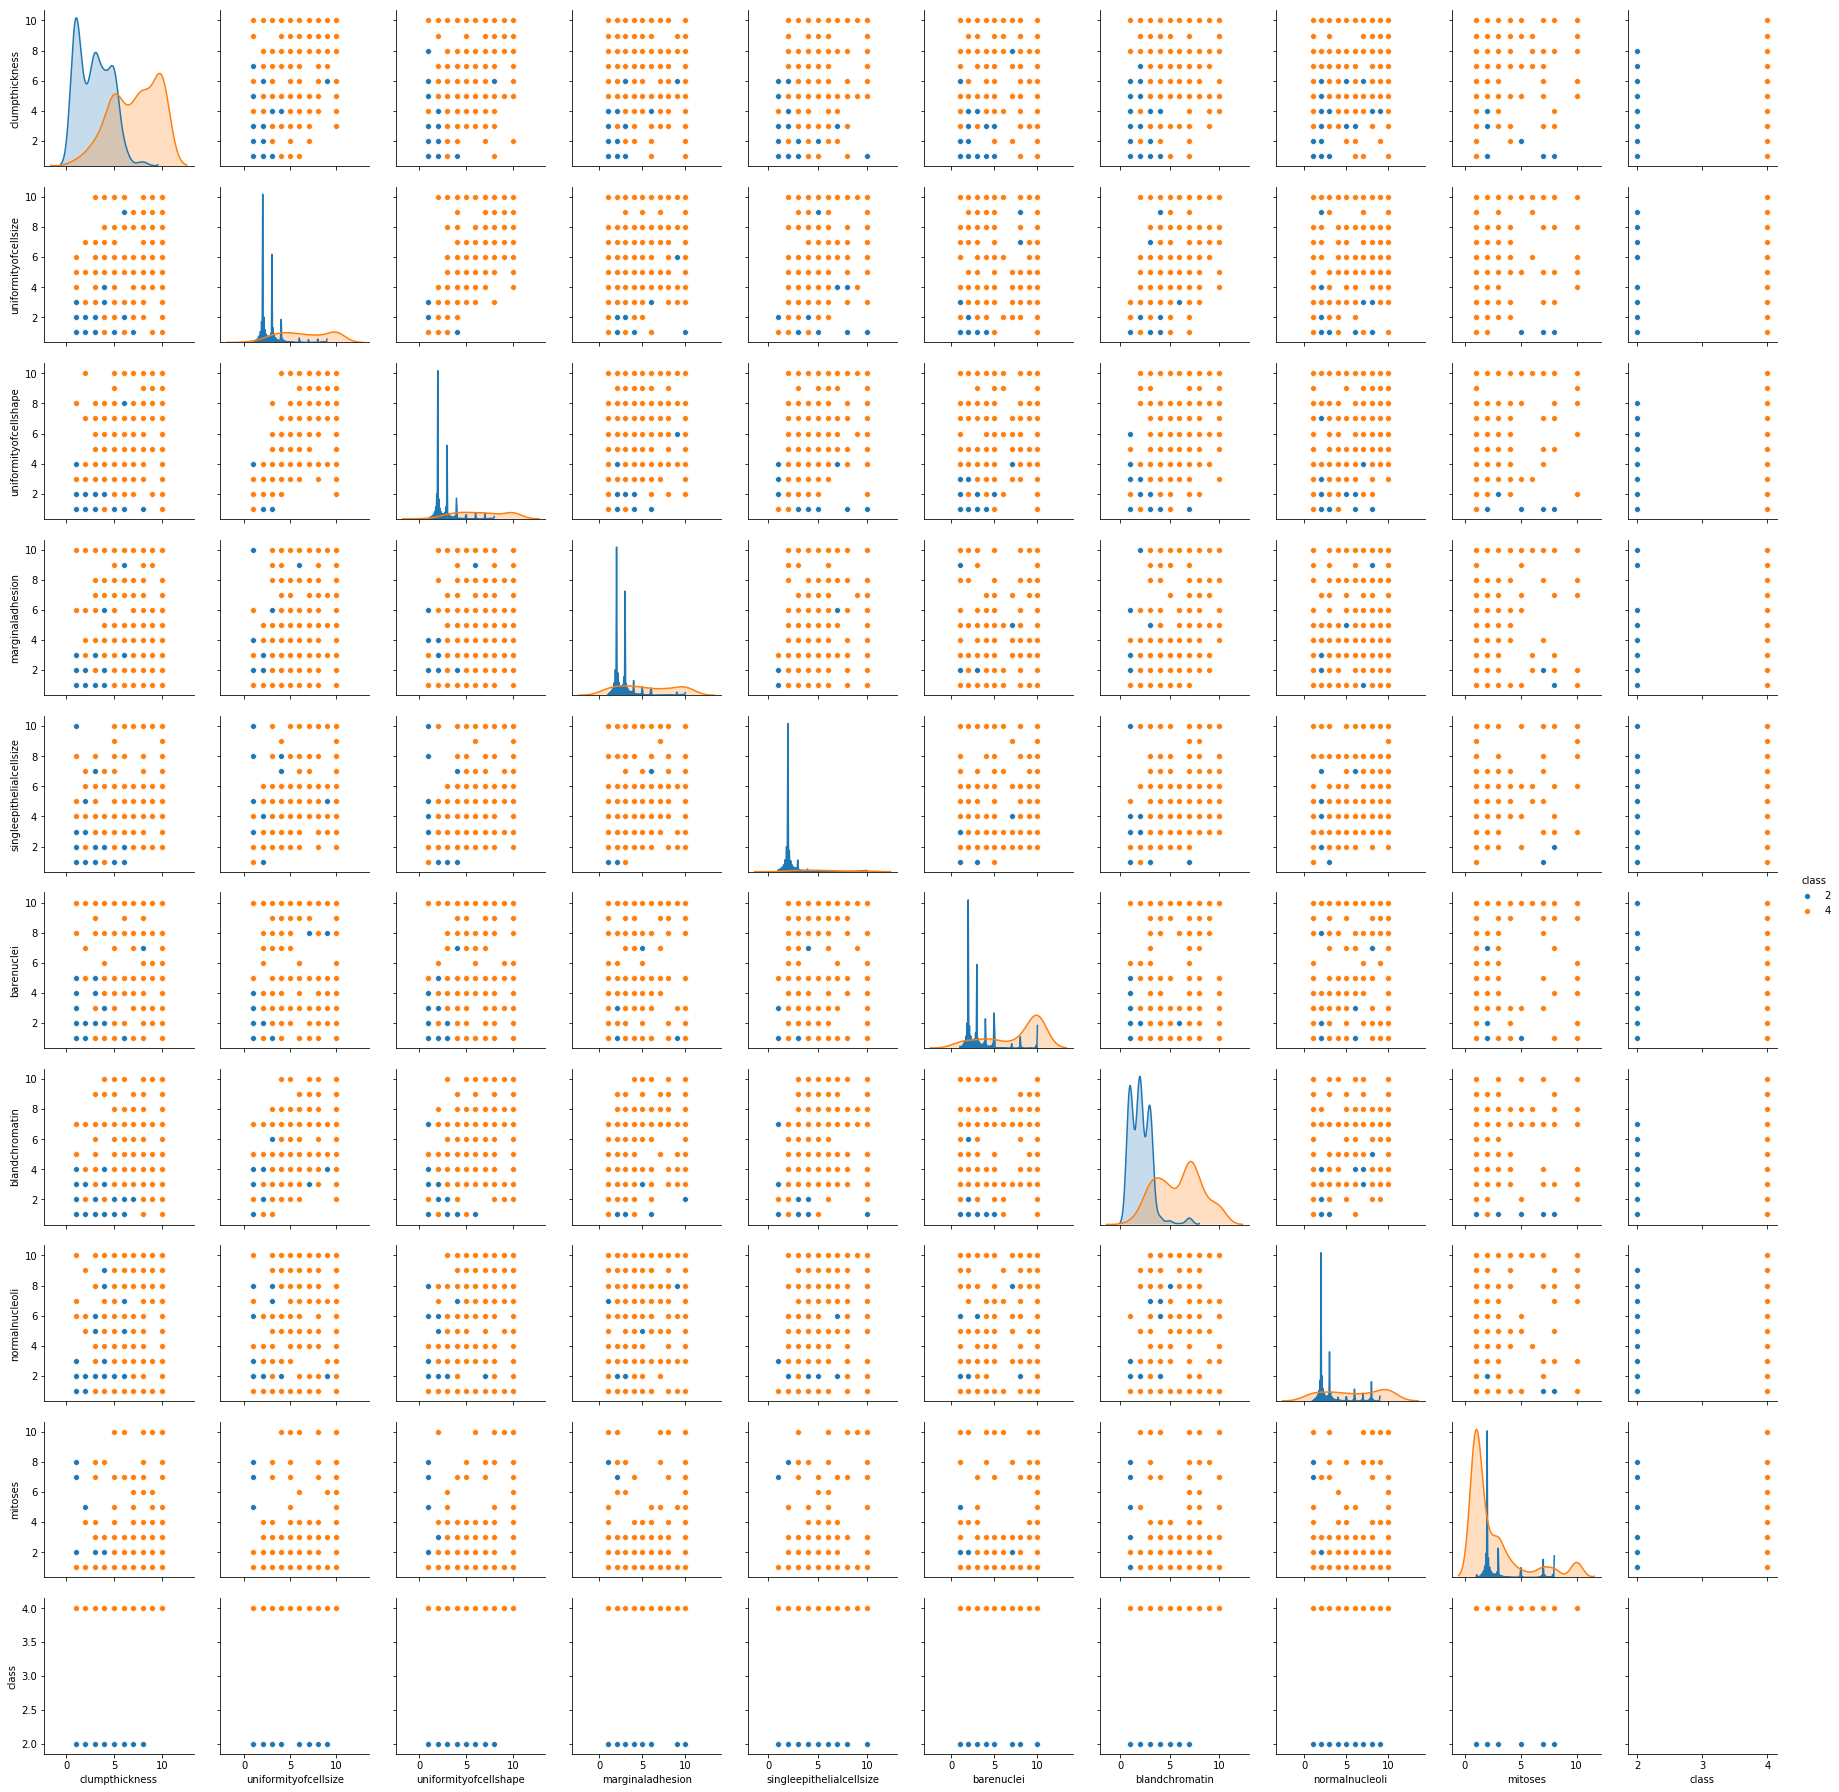

In [22]:
sns.pairplot(df, hue = "class", diag_kind="auto")

In [23]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [24]:
#Let us check for pair plots

In [25]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [26]:
# We could see most of the outliers are now removed.

In [27]:
# Removed 'samplecodenumber' column before correlation step.

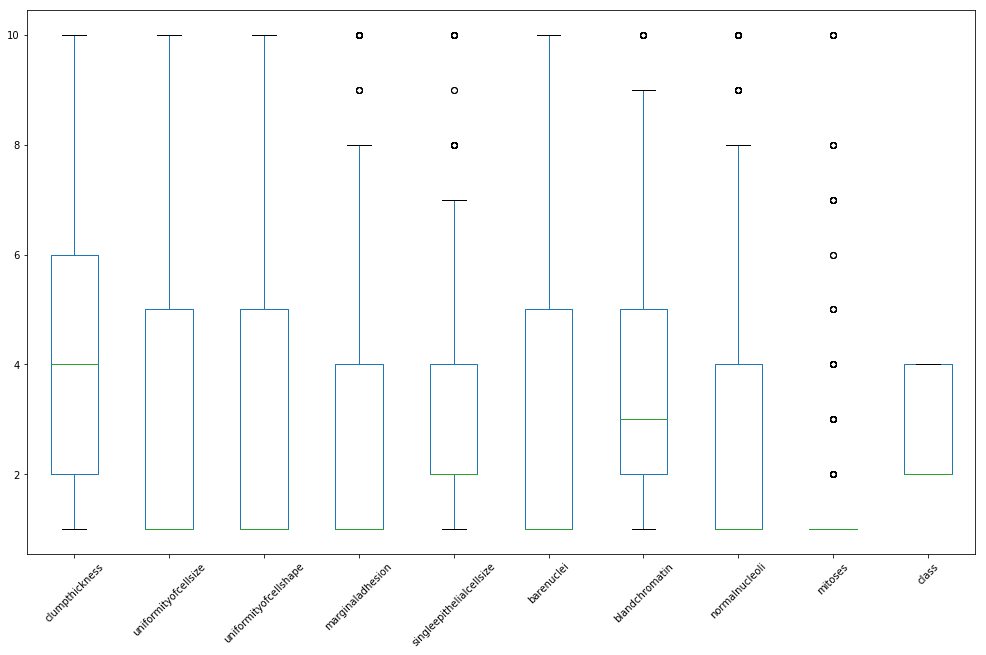

In [28]:
boxplot = df.boxplot(figsize=(17,10),grid=False,rot = 45)

#We are seeing outliers in mitoses, normalnucleoli, blandchromatin, singleepithelialcellsize, marginaladhesion

In [29]:
pd.crosstab(df['mitoses'],df['class']) # Will Combine 3 to 10 and going to call it 3
pd.crosstab(df['normalnucleoli'],df['class']) # Will Combine 4 to 10 and going to call it 4
pd.crosstab(df['blandchromatin'],df['class']) # Will Combine 4 to 10 and going to call it 4
pd.crosstab(df['singleepithelialcellsize'],df['class']) # Will Combine 4 to 10 and going to call it 4
pd.crosstab(df['marginaladhesion'],df['class']) # Will Combine 4 to 10 and going to call it 4

class,2,4
mitoses,,
1,445,134
2,8,27
3,2,31
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


class,2,4
normalnucleoli,,
1,402,41
2,30,6
3,12,32
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


class,2,4
blandchromatin,,
1,150,2
2,159,7
3,129,36
4,8,32
5,4,30
6,1,9
7,7,66
8,0,28
9,0,11


class,2,4
singleepithelialcellsize,,
1,46,1
2,363,23
3,29,43
4,7,41
5,5,34
6,2,39
7,3,9
8,2,19
9,0,2


class,2,4
marginaladhesion,,
1,375,32
2,37,21
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [30]:
df['mitoses'] = np.where(df.mitoses.isin([3,4,5,6,7,8,9,10]),3,df['mitoses'])
df['normalnucleoli'] = np.where(df.normalnucleoli.isin([4,5,6,7,8,9,10]),4,df['normalnucleoli'])
df['blandchromatin'] = np.where(df.blandchromatin.isin([4,5,6,7,8,9,10]),4,df['blandchromatin'])
df['singleepithelialcellsize'] = np.where(df.singleepithelialcellsize.isin([4,5,6,7,8,9,10]),4,df['singleepithelialcellsize'])
df['marginaladhesion'] = np.where(df.marginaladhesion.isin([4,5,6,7,8,9,10]),4,df['marginaladhesion'])

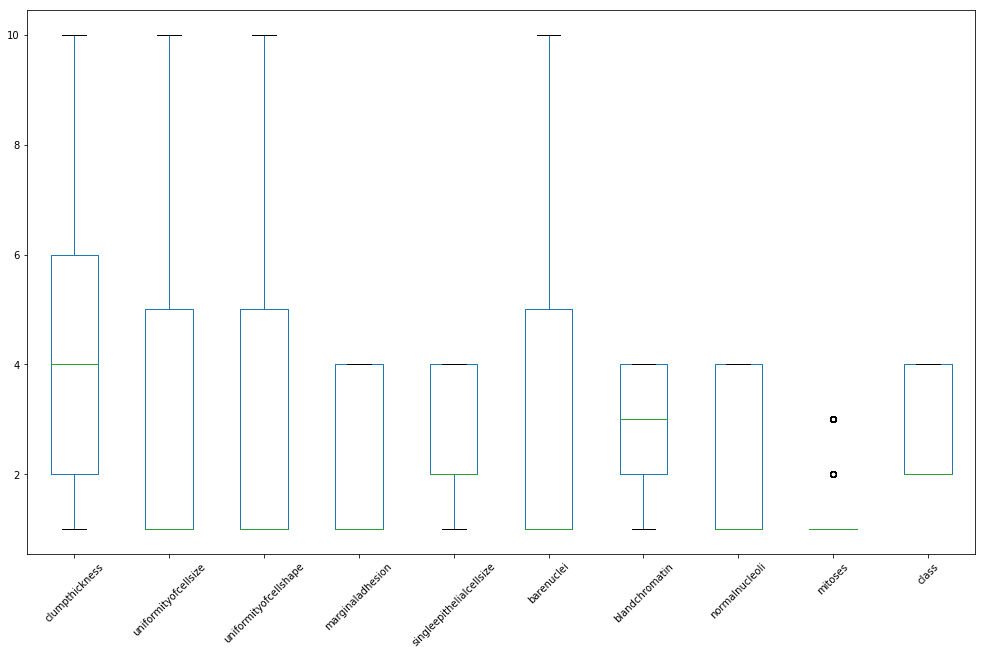

In [31]:
boxplot = df.boxplot(figsize=(17,10),grid=False,rot = 45)

#We still have outliers in mitoses column but if we combine some more levels, we will loose information. Leaving it as is for now.

# Q6 Create a covariance matrix for identifying Principal components

In [32]:
# PCA
# Step 1 - Create covariance matrix

df_class = df['class']
df = df.drop(['class'], axis=1)

#Storing class column in a separate dataframe for future use if needed and dropping it from main data frame

In [33]:
# Normalizing the data frame

from scipy import stats

df = stats.zscore(df)

In [34]:
df = pd.DataFrame(df)

In [35]:
df.columns = ['clumpthickness', 'uniformityofcellsize', 'uniformityofcellshape','marginaladhesion',
                        'singleepithelialcellsize','barenuclei','blandchromatin','normalnucleoli','mitoses']

In [36]:
df.head()

,clumpthickness,uniformityofcellsize,uniformityofcellshape,marginaladhesion,singleepithelialcellsize,barenuclei,blandchromatin,normalnucleoli,mitoses
0,0.206936,-0.699995,-0.743299,-0.776593,-0.612248,-0.686979,0.320648,-0.715534,-0.436962
1,0.206936,0.283845,0.266875,1.543230,1.460203,1.799664,0.320648,0.051580,-0.436962
2,-0.503866,-0.699995,-0.743299,-0.776593,-0.612248,-0.410685,0.320648,-0.715534,-0.436962
3,0.562336,1.595632,1.613773,-0.776593,0.423978,0.141902,0.320648,1.585807,-0.436962
4,-0.148465,-0.699995,-0.743299,0.769956,-0.612248,-0.686979,0.320648,-0.715534,-0.436962


In [37]:
dfT = df.T

In [38]:
df_cov = np.cov(dfT)

In [39]:
df_cov

array([[1.00143266, 0.64583645, 0.65552689, 0.55151351, 0.58748529,
        0.5908535 , 0.54459762, 0.57441661, 0.42662567],
       [0.64583645, 1.00143266, 0.90818117, 0.71521785, 0.77481515,
        0.68765657, 0.66589903, 0.72708042, 0.51272252],
       [0.65552689, 0.90818117, 1.00143266, 0.69734899, 0.7529968 ,
        0.70848734, 0.65627931, 0.7185753 , 0.48335106],
       [0.55151351, 0.71521785, 0.69734899, 1.00143266, 0.69249032,
        0.69254131, 0.60031999, 0.65284973, 0.42440609],
       [0.58748529, 0.77481515, 0.7529968 , 0.69249032, 1.00143266,
        0.68503965, 0.6328274 , 0.72403296, 0.46643934],
       [0.5908535 , 0.68765657, 0.70848734, 0.69254131, 0.68503965,
        1.00143266, 0.64218904, 0.64035854, 0.4537019 ],
       [0.54459762, 0.66589903, 0.65627931, 0.60031999, 0.6328274 ,
        0.64218904, 1.00143266, 0.65065116, 0.37952659],
       [0.57441661, 0.72708042, 0.7185753 , 0.65284973, 0.72403296,
        0.64035854, 0.65065116, 1.00143266, 0.49415997],


# Q7 Identify eigen values and eigen vector

In [40]:
# Step 2- Get eigen values and eigen vector

In [41]:
eig_val, eig_vec = np.linalg.eig(df_cov)

In [42]:
eig_val, eig_vec

# eig_val - eigen values
# eig_vec - eigen vector corresponding to each eigen value

(array([6.04389518, 0.68744549, 0.08941719, 0.48875833, 0.25593599,
        0.29502519, 0.32542678, 0.42591832, 0.40107151]),
 array([[ 0.30732153,  0.01872957,  0.0171651 ,  0.90989152, -0.07351399,
          0.07657967, -0.22769475,  0.07488734,  0.09101476],
        [ 0.37046058, -0.04039208,  0.72231664,  0.01233766,  0.11185712,
          0.09666323,  0.38423271, -0.28591253, -0.29664346],
        [ 0.36761658, -0.07862697, -0.67998448,  0.06710247,  0.23833845,
         -0.001833  ,  0.43088536, -0.28408632, -0.26195117],
        [ 0.33533943, -0.15504253, -0.04705311, -0.24737233, -0.00329256,
          0.64309279, -0.22727553, -0.28498226,  0.50364073],
        [ 0.35213576, -0.08484514, -0.06422354, -0.16833745, -0.78681415,
         -0.32145968, -0.19954922, -0.22095466, -0.15901534],
        [ 0.33877986, -0.10557225,  0.08362545, -0.07526106,  0.2235452 ,
         -0.61262022,  0.16333506,  0.10720527,  0.63085494],
        [ 0.32019718, -0.24872056, -0.02602508, -0.1375780

# Q8 Find variance and cumulative variance by each eigen vector

In [43]:
eig_val.sum()

eigval = eig_val*100/eig_val.sum()

eigval

np.cumsum(eigval)

9.012893982808022

array([67.05831875,  7.62735579,  0.99210302,  5.4228789 ,  2.83966499,
        3.27336799,  3.61068024,  4.72565551,  4.4499748 ])

array([ 67.05831875,  74.68567454,  75.67777757,  81.10065647,
        83.94032146,  87.21368945,  90.82436969,  95.5500252 ,
       100.        ])

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA().fit(df)

#Using all components

In [46]:
pca.components_

array([[ 0.30732153,  0.37046058,  0.36761658,  0.33533943,  0.35213576,
         0.33877986,  0.32019718,  0.34342963,  0.24794438],
       [ 0.01872957, -0.04039208, -0.07862697, -0.15504253, -0.08484514,
        -0.10557225, -0.24872056,  0.00523136,  0.94210605],
       [-0.90989152, -0.01233766, -0.06710247,  0.24737233,  0.16833745,
         0.07526106,  0.13757808,  0.2022278 ,  0.11146236],
       [ 0.07488734, -0.28591253, -0.28408632, -0.28498226, -0.22095466,
         0.10720527,  0.81630011,  0.09487578,  0.12273866],
       [-0.09101476,  0.29664346,  0.26195117, -0.50364073,  0.15901534,
        -0.63085494,  0.12124057,  0.37170647, -0.072923  ],
       [-0.22769475,  0.38423271,  0.43088536, -0.22727553, -0.19954922,
         0.16333506,  0.21590645, -0.66602962,  0.08058955],
       [-0.07657967, -0.09666323,  0.001833  , -0.64309279,  0.32145968,
         0.61262022, -0.25041677,  0.15439846, -0.07767094],
       [ 0.07351399, -0.11185712, -0.23833845,  0.00329256,  0

In [47]:
pca.explained_variance_

array([6.04389518, 0.68744549, 0.48875833, 0.42591832, 0.40107151,
       0.32542678, 0.29502519, 0.25593599, 0.08941719])

In [48]:
pca.explained_variance_ratio_

array([0.67058319, 0.07627356, 0.05422879, 0.04725656, 0.04449975,
       0.0361068 , 0.03273368, 0.02839665, 0.00992103])

In [49]:
np.cumsum(pca.explained_variance_ratio_*100)

array([ 67.05831875,  74.68567454,  80.10855344,  84.83420896,
        89.28418376,  92.894864  ,  96.16823199,  99.00789698,
       100.        ])

In [50]:
array_pca = pca.transform(df)

In [51]:
df_pca = pd.DataFrame(array_pca)

In [52]:
df_pca.columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9']

df_pca.head()

df_pca.shape



,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,-1.429132,-0.159689,-0.625942,0.849968,0.110732,0.060693,-0.224628,0.303263,0.019834
1,1.920285,-1.072872,0.559145,-0.497965,-1.455178,-0.171574,0.498279,0.669888,0.019845
2,-1.553974,-0.202171,0.041605,0.826358,0.001124,0.267667,-0.000932,0.189245,0.030739
3,1.833077,-0.594474,-0.433593,-0.371134,1.874101,0.273299,0.726791,-0.954019,0.115830
4,-1.019736,-0.406127,0.080008,0.382614,-0.635826,-0.209877,-1.191986,0.282228,-0.059036


(699, 9)

# Q10 Find correlation between components and features

In [53]:
pcacomp = pd.DataFrame(pca.components_)

In [54]:
pcacomp.columns = ['clumpthickness', 'uniformityofcellsize', 'uniformityofcellshape','marginaladhesion',
                        'singleepithelialcellsize','barenuclei','blandchromatin','normalnucleoli','mitoses']

In [55]:
pcacomp

,clumpthickness,uniformityofcellsize,uniformityofcellshape,marginaladhesion,singleepithelialcellsize,barenuclei,blandchromatin,normalnucleoli,mitoses
0,0.307322,0.370461,0.367617,0.335339,0.352136,0.338780,0.320197,0.343430,0.247944
1,0.018730,-0.040392,-0.078627,-0.155043,-0.084845,-0.105572,-0.248721,0.005231,0.942106
2,-0.909892,-0.012338,-0.067102,0.247372,0.168337,0.075261,0.137578,0.202228,0.111462
3,0.074887,-0.285913,-0.284086,-0.284982,-0.220955,0.107205,0.816300,0.094876,0.122739
4,-0.091015,0.296643,0.261951,-0.503641,0.159015,-0.630855,0.121241,0.371706,-0.072923
5,-0.227695,0.384233,0.430885,-0.227276,-0.199549,0.163335,0.215906,-0.666030,0.080590
6,-0.076580,-0.096663,0.001833,-0.643093,0.321460,0.612620,-0.250417,0.154398,-0.077671
7,0.073514,-0.111857,-0.238338,0.003293,0.786814,-0.223545,0.160117,-0.475753,0.065116
8,0.017165,0.722317,-0.679984,-0.047053,-0.064224,0.083625,-0.026025,0.013789,-0.037227


# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [56]:
data = pd.read_csv('jokes.csv', sep=",", header=0)
data.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [57]:
ratings = data.head(200)

In [58]:
ratings.head(3)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00


In [59]:
ratings = ratings.drop(['NumJokes'], axis=1) #Dropping first column

In [60]:
ratings.head(3)

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00


# Q13 Change the column indices from 0 to 99

In [61]:
# It's mentioned at the top that there are no column names mentioned but they are actually present in the dataframe. So skipping
# this step as Joke1, Joke2 names are simpler to use.

# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [62]:
ratings = ratings.replace(99, 0)

# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ratings)
ratings_diff = scaler.transform(ratings)
ratings_diff = pd.DataFrame(ratings_scaled)
ratings_diff.columns = ratings.columns

StandardScaler(copy=True, with_mean=True, with_std=True)

NameError: name 'ratings_scaled' is not defined

In [ ]:
ratings_diff.head()

### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke

In [ ]:
meanratings = ratings_diff.mean(axis = 0)

# Q17 Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [ ]:
meanratings = pd.DataFrame(meanratings)

In [ ]:
meanratings.head()

In [ ]:
meanratings.columns = ['RatingMean']

In [ ]:
sortedratings = meanratings.sort_values(by = 'RatingMean',axis = 0, ascending=False)

In [ ]:
sortedratings.head(10)